In [2]:

!pip install -U vnstock


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
 
## Có thể gọi các class chi tiết trong thư viện thay vì sử dụng cấp cao nhất là Vnstock
from vnstock import Vnstock
from vnstock import Listing, Quote, Company, Finance, Trading, Screener

In [4]:
# Tạo danh sách các mã cổ phiếu VN30 (cập nhật tháng 11/2025)
vn30_list = [
    # Ngân hàng (13 mã)
    'ACB', 'BID', 'CTG', 'HDB', 'MBB', 'SHB', 'SSB', 'STB', 'TCB', 'TPB', 'VCB', 'VIB', 'VPB',
    # Bảo hiểm (1 mã)
    'BVH',
    # Công nghệ - Thông tin (1 mã)
    'FPT',
    # Năng lượng (3 mã)
    'GAS', 'PLX', 'POW',
    # Tập đoàn đa ngành (6 mã)
    'GVR', 'SAB', 'VIC', 'VJC', 'VNM', 'VHM',
    # Bán lẻ - Công nghệ (1 mã)
    'MWG',
    # Hàng tiêu dùng - Thực phẩm (1 mã)
    'MSN',
    # Thép - Công nghiệp (1 mã)
    'HPG',
    # Bất động sản (2 mã)
    'BCM', 'VRE',
    # Chứng khoán (1 mã)
    'SSI'
]

print(f"✓ Đã tạo danh sách VN30 với {len(vn30_list)} mã cổ phiếu")
print(f"Danh sách: {sorted(vn30_list)}")

✓ Đã tạo danh sách VN30 với 30 mã cổ phiếu
Danh sách: ['ACB', 'BCM', 'BID', 'BVH', 'CTG', 'FPT', 'GAS', 'GVR', 'HDB', 'HPG', 'MBB', 'MSN', 'MWG', 'PLX', 'POW', 'SAB', 'SHB', 'SSB', 'SSI', 'STB', 'TCB', 'TPB', 'VCB', 'VHM', 'VIB', 'VIC', 'VJC', 'VNM', 'VPB', 'VRE']


In [5]:
# Phân loại các mã VN30 theo ngành nghề
import pandas as pd

# Dictionary phân loại ngành (cập nhật 11/2025)
vn30_sectors_dict = {
    'Ngân hàng': ['ACB', 'BID', 'CTG', 'HDB', 'MBB', 'SHB', 'SSB', 'STB', 'TCB', 'TPB', 'VCB', 'VIB', 'VPB'],
    'Bảo hiểm': ['BVH'],
    'Công nghệ - Thông tin': ['FPT'],
    'Năng lượng': ['GAS', 'PLX', 'POW'],
    'Tập đoàn đa ngành': ['GVR', 'SAB', 'VIC', 'VJC', 'VNM', 'VHM'],
    'Bán lẻ - Công nghệ': ['MWG'],
    'Hàng tiêu dùng - Thực phẩm': ['MSN'],
    'Thép - Công nghiệp': ['HPG'],
    'Bất động sản': ['BCM', 'VRE'],
    'Chứng khoán': ['SSI']
}

# Tạo DataFrame từ dictionary
sector_data = []
for sector, symbols in vn30_sectors_dict.items():
    for symbol in symbols:
        sector_data.append({'symbol': symbol, 'sector': sector})

df_sectors = pd.DataFrame(sector_data)

# Kiểm tra tổng số mã
print("Phân loại ngành cho VN30:")
print(df_sectors.groupby('sector')['symbol'].apply(list))
print(f"\nTổng số mã: {len(df_sectors)}")
print(f"\nCác ngành:")
for sector, count in df_sectors['sector'].value_counts().items():
    print(f"  • {sector}: {count} mã")

df_sectors.head()

Phân loại ngành cho VN30:
sector
Bán lẻ - Công nghệ                                                        [MWG]
Bảo hiểm                                                                  [BVH]
Bất động sản                                                         [BCM, VRE]
Chứng khoán                                                               [SSI]
Công nghệ - Thông tin                                                     [FPT]
Hàng tiêu dùng - Thực phẩm                                                [MSN]
Ngân hàng                     [ACB, BID, CTG, HDB, MBB, SHB, SSB, STB, TCB, ...
Năng lượng                                                      [GAS, PLX, POW]
Thép - Công nghiệp                                                        [HPG]
Tập đoàn đa ngành                                [GVR, SAB, VIC, VJC, VNM, VHM]
Name: symbol, dtype: object

Tổng số mã: 30

Các ngành:
  • Ngân hàng: 13 mã
  • Tập đoàn đa ngành: 6 mã
  • Năng lượng: 3 mã
  • Bất động sản: 2 mã
  • Bảo hiểm: 1 mã

,symbol,sector
0,ACB,Ngân hàng
1,BID,Ngân hàng
2,CTG,Ngân hàng
3,HDB,Ngân hàng
4,MBB,Ngân hàng


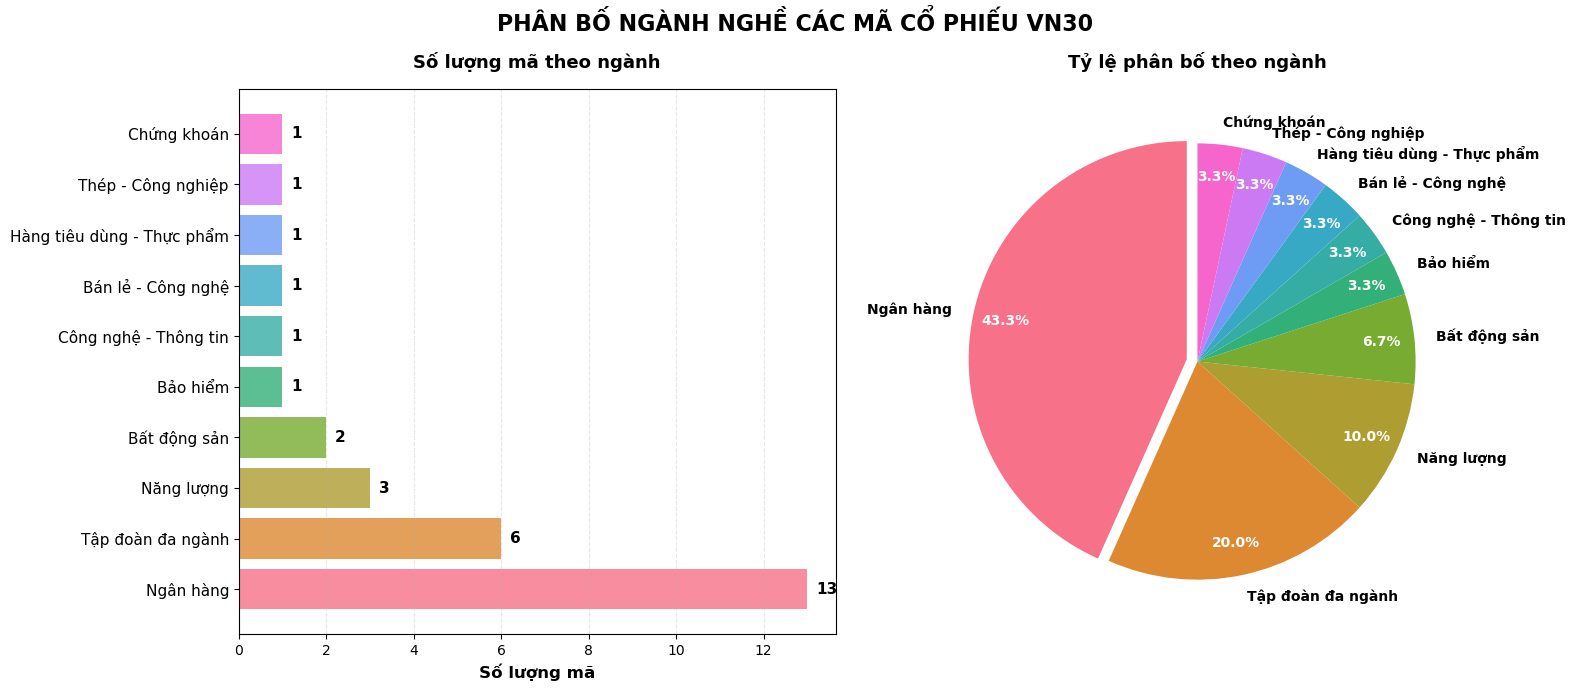


THỐNG KÊ PHÂN BỐ NGÀNH VN30

📊 Ngân hàng: 13 mã (43.3%)
   └─ ACB, BID, CTG, HDB, MBB, SHB, SSB, STB, TCB, TPB, VCB, VIB, VPB

📊 Tập đoàn đa ngành: 6 mã (20.0%)
   └─ GVR, SAB, VHM, VIC, VJC, VNM

📊 Năng lượng: 3 mã (10.0%)
   └─ GAS, PLX, POW

📊 Bất động sản: 2 mã (6.7%)
   └─ BCM, VRE

📊 Bảo hiểm: 1 mã (3.3%)
   └─ BVH

📊 Công nghệ - Thông tin: 1 mã (3.3%)
   └─ FPT

📊 Bán lẻ - Công nghệ: 1 mã (3.3%)
   └─ MWG

📊 Hàng tiêu dùng - Thực phẩm: 1 mã (3.3%)
   └─ MSN

📊 Thép - Công nghiệp: 1 mã (3.3%)
   └─ HPG

📊 Chứng khoán: 1 mã (3.3%)
   └─ SSI

TỔNG CỘNG: 30 mã cổ phiếu VN30


In [6]:
# Vẽ biểu đồ phân bố ngành cho VN30
import matplotlib.pyplot as plt
import seaborn as sns

# Thiết lập font hỗ trợ tiếng Việt
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

# Đếm số lượng mã theo ngành
sector_counts = df_sectors['sector'].value_counts()

# Tạo figure với 2 subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))
fig.suptitle('PHÂN BỐ NGÀNH NGHỀ CÁC MÃ CỔ PHIẾU VN30', 
             fontsize=16, fontweight='bold', y=0.98)

# Màu sắc
colors = sns.color_palette("husl", len(sector_counts))

# 1. Biểu đồ cột (Bar Chart)
bars = ax1.barh(range(len(sector_counts)), sector_counts.values, color=colors, alpha=0.8)
ax1.set_yticks(range(len(sector_counts)))
ax1.set_yticklabels(sector_counts.index, fontsize=11)
ax1.set_xlabel('Số lượng mã', fontsize=12, fontweight='bold')
ax1.set_title('Số lượng mã theo ngành', fontsize=13, fontweight='bold', pad=15)
ax1.grid(axis='x', alpha=0.3, linestyle='--')

# Thêm số liệu vào cột
for i, (bar, v) in enumerate(zip(bars, sector_counts.values)):
    ax1.text(v + 0.2, i, str(v), va='center', fontweight='bold', fontsize=11)

# 2. Biểu đồ tròn (Pie Chart)
wedges, texts, autotexts = ax2.pie(sector_counts.values, 
                                     labels=sector_counts.index,
                                     autopct='%1.1f%%',
                                     colors=colors,
                                     startangle=90,
                                     pctdistance=0.85,
                                     explode=[0.05 if i == 0 else 0 for i in range(len(sector_counts))])
ax2.set_title('Tỷ lệ phân bố theo ngành', fontsize=13, fontweight='bold', pad=15)

# Làm đẹp text
for text in texts:
    text.set_fontsize(10)
    text.set_fontweight('bold')
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(10)

plt.tight_layout()
plt.show()

# In thống kê ra console
print("\n" + "="*80)
print("THỐNG KÊ PHÂN BỐ NGÀNH VN30")
print("="*80)
for sector, count in sector_counts.items():
    symbols = sorted(df_sectors[df_sectors['sector'] == sector]['symbol'].values)
    percentage = count/len(df_sectors)*100
    print(f"\n📊 {sector}: {count} mã ({percentage:.1f}%)")
    print(f"   └─ {', '.join(symbols)}")
print("\n" + "="*80)
print(f"TỔNG CỘNG: {len(df_sectors)} mã cổ phiếu VN30")
print("="*80)

In [14]:
# Lấy dữ liệu OHLCV của VN30
import pandas as pd
from vnstock import Vnstock

start = "2014-01-01"
end = "2024-12-31"


print("="*80)
print("LẤY DỮ LIỆU OHLCV CHO VN30")
print("="*80)
print(f"📅 Khoảng thời gian: {start} đến {end}")
print(f"📊 Số mã cổ phiếu: {len(vn30_list)}")
print(f"📈 Dữ liệu: Open, High, Low, Close, Volume")
print("-"*80)

# Lấy dữ liệu cho từng mã
all_data = []
success_count = 0
failed_symbols = []

for i, symbol in enumerate(vn30_list, 1):
    try:
        print(f"[{i:2d}/{len(vn30_list)}] Đang lấy {symbol}...", end=' ')
        
        stock = Vnstock().stock(symbol=symbol, source='VCI')
        df = stock.quote.history(start=start, end=end)
        
        if df is not None and not df.empty:
            # Reset index để chuyển time/date thành cột
            df = df.reset_index()
            
            # Chuẩn hóa tên cột nếu cần
            if 'time' in df.columns:
                df = df.rename(columns={'time': 'date'})
            
            # Chọn các cột OHLCV + date
            ohlcv_cols = ['date', 'open', 'high', 'low', 'close', 'volume']
            df = df[[col for col in ohlcv_cols if col in df.columns]]
            
            # Thêm cột symbol
            df['symbol'] = symbol
            
            all_data.append(df)
            success_count += 1
            print(f"✓ ({len(df):,} ngày)")
        else:
            failed_symbols.append(symbol)
            print(f"✗ Không có dữ liệu")
            
    except Exception as e:
        failed_symbols.append(symbol)
        print(f"✗ Lỗi: {str(e)[:50]}")

# Gộp tất cả dữ liệu
if all_data:
    vn30_ohlcv = pd.concat(all_data, ignore_index=True)
    
    # Chuyển đổi date sang datetime
    vn30_ohlcv['date'] = pd.to_datetime(vn30_ohlcv['date'])
    
    # Sắp xếp theo symbol và date
    vn30_ohlcv = vn30_ohlcv.sort_values(['symbol', 'date']).reset_index(drop=True)
    
    print("\n" + "="*80)
    print("KẾT QUẢ")
    print("="*80)
    print(f"✅ Số mã lấy thành công: {success_count}/{len(vn30_list)}")
    print(f"✅ Tổng số dòng dữ liệu: {len(vn30_ohlcv):,}")
    
    if failed_symbols:
        print(f"⚠️  Các mã thất bại ({len(failed_symbols)}): {', '.join(failed_symbols)}")
    
    # Thống kê chi tiết
    print(f"\n📋 Các cột dữ liệu:")
    for col in vn30_ohlcv.columns:
        print(f"   • {col}")
    
    print(f"\n📊 Thống kê:")
    print(f"   • Số mã: {vn30_ohlcv['symbol'].nunique()}")
    print(f"   • Khoảng thời gian: {vn30_ohlcv['date'].min().date()} đến {vn30_ohlcv['date'].max().date()}")
    print(f"   • Trung bình ngày/mã: {len(vn30_ohlcv) / vn30_ohlcv['symbol'].nunique():.0f}")
    
    # Thống kê theo từng mã
    print(f"\n📈 Số ngày giao dịch theo từng mã:")
    symbol_counts = vn30_ohlcv['symbol'].value_counts().sort_index()
    for symbol, count in symbol_counts.items():
        print(f"   {symbol}: {count:,} ngày")
    
    # Hiển thị mẫu dữ liệu
    print(f"\n📄 Mẫu dữ liệu OHLCV (10 dòng đầu):")
    display(vn30_ohlcv.head(10))
    
    print(f"\n💾 Dữ liệu đã lưu vào biến: vn30_ohlcv")
    print(f"   Shape: {vn30_ohlcv.shape} (rows, columns)")
    
else:
    print("\n❌ Không lấy được dữ liệu nào!")
    vn30_ohlcv = pd.DataFrame()



LẤY DỮ LIỆU OHLCV CHO VN30
📅 Khoảng thời gian: 2014-01-01 đến 2024-12-31
📊 Số mã cổ phiếu: 30
📈 Dữ liệu: Open, High, Low, Close, Volume
--------------------------------------------------------------------------------
[ 1/30] Đang lấy ACB... ✓ (2,872 ngày)
[ 2/30] Đang lấy BID... ✓ (2,872 ngày)
[ 2/30] Đang lấy BID... ✓ (2,730 ngày)
[ 3/30] Đang lấy CTG... ✓ (2,730 ngày)
[ 3/30] Đang lấy CTG... ✓ (2,872 ngày)
[ 4/30] Đang lấy HDB... ✓ (2,872 ngày)
[ 4/30] Đang lấy HDB... ✓ (1,747 ngày)
[ 5/30] Đang lấy MBB... ✓ (1,747 ngày)
[ 5/30] Đang lấy MBB... ✓ (2,872 ngày)
[ 6/30] Đang lấy SHB... ✓ (2,872 ngày)
[ 6/30] Đang lấy SHB... ✓ (2,872 ngày)
[ 7/30] Đang lấy SSB... ✓ (2,872 ngày)
[ 7/30] Đang lấy SSB... ✓ (946 ngày)
[ 8/30] Đang lấy STB... ✓ (946 ngày)
[ 8/30] Đang lấy STB... ✓ (2,872 ngày)
[ 9/30] Đang lấy TCB... ✓ (2,872 ngày)
[ 9/30] Đang lấy TCB... ✓ (1,649 ngày)
[10/30] Đang lấy TPB... ✓ (1,649 ngày)
[10/30] Đang lấy TPB... ✓ (1,678 ngày)
[11/30] Đang lấy VCB... ✓ (1,678 ngày)
[11/30]

,date,open,high,low,close,volume,symbol
0,2013-07-01,2.34,2.35,2.34,2.35,341800,ACB
1,2013-07-02,2.34,2.37,2.34,2.37,339900,ACB
2,2013-07-03,2.35,2.37,2.34,2.37,374100,ACB
3,2013-07-04,2.34,2.37,2.34,2.37,298600,ACB
4,2013-07-05,2.35,2.35,2.34,2.34,309500,ACB
5,2013-07-08,2.34,2.34,2.31,2.31,62200,ACB
6,2013-07-09,2.32,2.34,2.31,2.32,341200,ACB
7,2013-07-10,2.32,2.34,2.31,2.34,132200,ACB
8,2013-07-11,2.32,2.34,2.31,2.32,80300,ACB
9,2013-07-12,2.32,2.34,2.31,2.34,231400,ACB



💾 Dữ liệu đã lưu vào biến: vn30_ohlcv
   Shape: (71093, 7) (rows, columns)


In [8]:
# Kiểm tra giá trị NaN/Null trong dữ liệu từng mã cổ phiếu VN30
if 'vn30_ohlcv' in globals() and not vn30_ohlcv.empty:
    null_counts = vn30_ohlcv.isnull().groupby(vn30_ohlcv['symbol']).sum()
    total_null = vn30_ohlcv.isnull().groupby(vn30_ohlcv['symbol']).any().sum(axis=1)
    
    found = False
    for symbol in vn30_ohlcv['symbol'].unique():
        symbol_df = vn30_ohlcv[vn30_ohlcv['symbol'] == symbol]
        null_rows = symbol_df[symbol_df.isnull().any(axis=1)]
        if not null_rows.empty:
            found = True
            print(f"{symbol}: {len(null_rows)} dòng có giá trị NaN/Null")
            display(null_rows)
    if not found:
        print("Không có mã nào có giá trị NaN/Null.")
else:
    print("Dữ liệu vn30_ohlcv không tồn tại hoặc rỗng.")

Không có mã nào có giá trị NaN/Null.


In [9]:
if 'vn30_ohlcv' in globals() and not vn30_ohlcv.empty:
    print("Ngày giao dịch đầu và cuối của từng mã cổ phiếu:")
    for symbol in vn30_ohlcv['symbol'].unique():
        symbol_df = vn30_ohlcv[vn30_ohlcv['symbol'] == symbol]
        if not symbol_df.empty and 'date' in symbol_df.columns:
            min_date = symbol_df['date'].min()
            max_date = symbol_df['date'].max()
            print(f"{symbol}: từ {min_date.strftime('%d/%m/%Y')} đến {max_date.strftime('%d/%m/%Y')}")
else:
    print("Dữ liệu vn30_ohlcv không tồn tại hoặc rỗng.")

Ngày giao dịch đầu và cuối của từng mã cổ phiếu:
ACB: từ 01/07/2013 đến 31/12/2024
BCM: từ 21/02/2018 đến 31/12/2024
BID: từ 24/01/2014 đến 31/12/2024
BVH: từ 08/07/2013 đến 31/12/2024
CTG: từ 08/07/2013 đến 31/12/2024
FPT: từ 08/07/2013 đến 31/12/2024
GAS: từ 08/07/2013 đến 31/12/2024
GVR: từ 21/03/2018 đến 31/12/2024
HDB: từ 05/01/2018 đến 31/12/2024
HPG: từ 08/07/2013 đến 31/12/2024
MBB: từ 08/07/2013 đến 31/12/2024
MSN: từ 08/07/2013 đến 31/12/2024
MSN: từ 08/07/2013 đến 31/12/2024
MWG: từ 14/07/2014 đến 31/12/2024
PLX: từ 21/04/2017 đến 31/12/2024
POW: từ 06/03/2018 đến 31/12/2024
SAB: từ 06/12/2016 đến 31/12/2024
SHB: từ 03/07/2013 đến 31/12/2024
SSB: từ 24/03/2021 đến 31/12/2024
SSI: từ 08/07/2013 đến 31/12/2024
STB: từ 08/07/2013 đến 31/12/2024
TCB: từ 04/06/2018 đến 31/12/2024
TPB: từ 19/04/2018 đến 31/12/2024
VCB: từ 08/07/2013 đến 31/12/2024
VHM: từ 31/08/2012 đến 31/12/2024
VIB: từ 09/01/2017 đến 31/12/2024
VIC: từ 08/07/2013 đến 31/12/2024
VJC: từ 28/02/2017 đến 31/12/2024

In [10]:
# Lấy dữ liệu của mã BCM từ vn30_ohlcv
if 'vn30_ohlcv' in globals() and not vn30_ohlcv.empty:
    bcm_df = vn30_ohlcv[vn30_ohlcv['symbol'] == 'BCM']
    print(f"Số dòng dữ liệu cho BCM: {len(bcm_df)}")
    display(bcm_df)
else:
    print("Dữ liệu vn30_ohlcv không tồn tại hoặc rỗng.")

Số dòng dữ liệu cho BCM: 1712


,date,open,high,low,close,volume,symbol
2872,2018-02-21,27.07,27.07,22.86,22.86,81200,BCM
2873,2018-02-22,23.78,23.78,22.86,22.86,28900,BCM
2874,2018-02-23,23.05,23.05,20.49,21.03,37800,BCM
2875,2018-02-26,20.12,22.22,18.29,20.94,21100,BCM
2876,2018-02-27,22.68,22.68,18.29,21.95,34700,BCM
...,...,...,...,...,...,...,...
4579,2024-12-25,67.90,70.40,67.70,69.30,686500,BCM
4580,2024-12-26,69.30,70.00,68.80,69.70,156700,BCM
4581,2024-12-27,69.70,69.80,68.80,69.80,261500,BCM
4582,2024-12-30,68.80,70.00,68.20,69.80,233500,BCM


In [11]:
# Kiểm tra giá trị 0 trong dữ liệu từng mã cổ phiếu VN30
if 'vn30_ohlcv' in globals() and not vn30_ohlcv.empty:
    found = False
    numeric_cols = ['open', 'high', 'low', 'close', 'volume']
    for symbol in vn30_ohlcv['symbol'].unique():
        symbol_df = vn30_ohlcv[vn30_ohlcv['symbol'] == symbol]
        zero_rows = symbol_df[(symbol_df[numeric_cols] == 0).any(axis=1)] if not symbol_df.empty else symbol_df
        if not zero_rows.empty:
            found = True
            print(f"{symbol}: {len(zero_rows)} dòng có giá trị 0")
            display(zero_rows)
    if not found:
        print("Không có mã nào có giá trị 0 ở các cột số.")
else:
    print("Dữ liệu vn30_ohlcv không tồn tại hoặc rỗng.")

BCM: 15 dòng có giá trị 0


,date,open,high,low,close,volume,symbol
2927,2018-05-14,21.86,21.86,21.86,21.86,0,BCM
2935,2018-05-24,23.32,23.32,23.32,23.32,0,BCM
2936,2018-05-25,23.32,23.32,23.32,23.32,0,BCM
2939,2018-05-30,21.49,21.49,21.49,21.49,0,BCM
2940,2018-05-31,21.49,21.49,21.49,21.49,0,BCM
2958,2018-06-26,19.94,19.94,19.94,19.94,0,BCM
2978,2018-07-24,14.91,14.91,14.91,14.91,0,BCM
3050,2018-11-02,17.83,17.83,17.83,17.83,0,BCM
3061,2018-11-19,18.11,18.11,18.11,18.11,0,BCM
3065,2018-11-23,18.11,18.29,18.29,18.29,0,BCM


BID: 2 dòng có giá trị 0


,date,open,high,low,close,volume,symbol
5579,2018-01-23,15.53,15.53,15.53,15.53,0,BID
5580,2018-01-24,15.53,15.53,15.53,15.53,0,BID


BVH: 2 dòng có giá trị 0


,date,open,high,low,close,volume,symbol
8451,2018-01-23,66.63,66.63,66.63,66.63,0,BVH
8452,2018-01-24,66.63,66.63,66.63,66.63,0,BVH


CTG: 2 dòng có giá trị 0


,date,open,high,low,close,volume,symbol
11323,2018-01-23,17.04,17.04,17.04,17.04,0,CTG
11324,2018-01-24,17.04,17.04,17.04,17.04,0,CTG


FPT: 2 dòng có giá trị 0


,date,open,high,low,close,volume,symbol
14195,2018-01-23,16.09,16.09,16.09,16.09,0,FPT
14196,2018-01-24,16.09,16.09,16.09,16.09,0,FPT


GAS: 2 dòng có giá trị 0


,date,open,high,low,close,volume,symbol
17067,2018-01-23,60.29,60.29,60.29,60.29,0,GAS
17068,2018-01-24,60.29,60.29,60.29,60.29,0,GAS


HDB: 2 dòng có giá trị 0


,date,open,high,low,close,volume,symbol
20507,2018-01-23,11.19,11.19,11.19,11.19,0,HDB
20508,2018-01-24,11.19,11.19,11.19,11.19,0,HDB


HPG: 2 dòng có giá trị 0


,date,open,high,low,close,volume,symbol
23379,2018-01-23,12.05,12.05,12.05,12.05,0,HPG
23380,2018-01-24,12.05,12.05,12.05,12.05,0,HPG


MBB: 2 dòng có giá trị 0


,date,open,high,low,close,volume,symbol
26251,2018-01-23,6.17,6.17,6.17,6.17,0,MBB
26252,2018-01-24,6.17,6.17,6.17,6.17,0,MBB


MSN: 2 dòng có giá trị 0


,date,open,high,low,close,volume,symbol
29123,2018-01-23,74.85,74.85,74.85,74.85,0,MSN
29124,2018-01-24,74.85,74.85,74.85,74.85,0,MSN


MWG: 2 dòng có giá trị 0


,date,open,high,low,close,volume,symbol
31743,2018-01-23,29.46,29.46,29.46,29.46,0,MWG
31744,2018-01-24,29.46,29.46,29.46,29.46,0,MWG


PLX: 2 dòng có giá trị 0


,date,open,high,low,close,volume,symbol
33671,2018-01-23,68.28,68.28,68.28,68.28,0,PLX
33672,2018-01-24,68.28,68.28,68.28,68.28,0,PLX


POW: 1 dòng có giá trị 0


,date,open,high,low,close,volume,symbol
35502,2018-07-23,12.31,12.31,11.92,0.0,802090,POW


SAB: 2 dòng có giá trị 0


,date,open,high,low,close,volume,symbol
37391,2018-01-23,100.39,100.39,100.39,100.39,0,SAB
37392,2018-01-24,100.39,100.39,100.39,100.39,0,SAB


SSI: 2 dòng có giá trị 0


,date,open,high,low,close,volume,symbol
44081,2018-01-23,11.45,11.45,11.45,11.45,0,SSI
44082,2018-01-24,11.45,11.45,11.45,11.45,0,SSI


STB: 2 dòng có giá trị 0


,date,open,high,low,close,volume,symbol
46953,2018-01-23,15.1,15.1,15.1,15.1,0,STB
46954,2018-01-24,15.1,15.1,15.1,15.1,0,STB


VCB: 2 dòng có giá trị 0


,date,open,high,low,close,volume,symbol
53152,2018-01-23,26.75,26.75,26.75,26.75,0,VCB
53153,2018-01-24,26.75,26.75,26.75,26.75,0,VCB


VHM: 1118 dòng có giá trị 0


,date,open,high,low,close,volume,symbol
54887,2012-08-31,29.71,29.71,29.71,29.71,0,VHM
54888,2012-09-04,29.71,29.71,29.71,29.71,0,VHM
54889,2012-09-05,29.71,29.71,29.71,29.71,0,VHM
54890,2012-09-06,29.71,29.71,29.71,29.71,0,VHM
54891,2012-09-07,29.71,29.71,29.71,29.71,0,VHM
...,...,...,...,...,...,...,...
56095,2017-07-11,17.47,17.47,17.47,17.47,0,VHM
56096,2017-07-12,17.47,17.47,17.47,17.47,0,VHM
56097,2017-07-13,17.47,17.47,17.47,17.47,0,VHM
56099,2018-05-18,64.36,64.36,64.36,64.36,0,VHM


VIB: 2 dòng có giá trị 0


,date,open,high,low,close,volume,symbol
57891,2017-07-24,2.97,2.97,2.97,2.97,0,VIB
58141,2018-07-23,3.73,3.85,3.73,0.00,218470,VIB


VIC: 2 dòng có giá trị 0


,date,open,high,low,close,volume,symbol
60885,2018-01-23,62.44,62.44,62.44,62.44,0,VIC
60886,2018-01-24,62.44,62.44,62.44,62.44,0,VIC


VJC: 2 dòng có giá trị 0


,date,open,high,low,close,volume,symbol
62850,2018-01-23,151.13,151.13,151.13,151.13,0,VJC
62851,2018-01-24,151.13,151.13,151.13,151.13,0,VJC


VNM: 2 dòng có giá trị 0


,date,open,high,low,close,volume,symbol
65722,2018-01-23,100.7,100.7,100.7,100.7,0,VNM
65723,2018-01-24,100.7,100.7,100.7,100.7,0,VNM


VPB: 2 dòng có giá trị 0


,date,open,high,low,close,volume,symbol
67568,2018-01-23,9.93,9.93,9.93,9.93,0,VPB
67569,2018-01-24,9.93,9.93,9.93,9.93,0,VPB


VRE: 5 dòng có giá trị 0


,date,open,high,low,close,volume,symbol
69304,2017-11-07,32.15,32.15,32.15,32.15,0,VRE
69305,2017-11-08,32.15,32.15,32.15,32.15,0,VRE
69306,2017-11-09,32.15,32.15,32.15,32.15,0,VRE
69358,2018-01-23,47.18,47.18,47.18,47.18,0,VRE
69359,2018-01-24,47.18,47.18,47.18,47.18,0,VRE


In [13]:
# In các cổ phiếu có cùng ngày đầu tiên giao dịch từ vn30_ohlcv
if 'vn30_ohlcv' in globals() and not vn30_ohlcv.empty:
    # Lấy ngày đầu tiên giao dịch của từng mã
    first_dates = vn30_ohlcv.groupby('symbol')['date'].min()
    # Đếm số lượng mã theo từng ngày đầu tiên
    date_counts = first_dates.value_counts()
    # Chỉ lấy các ngày có nhiều hơn 1 mã bắt đầu giao dịch
    common_dates = date_counts[date_counts > 1].index
    if len(common_dates) == 0:
        print("Không có cổ phiếu nào có cùng ngày đầu tiên giao dịch.")
    else:
        for d in sorted(common_dates):
            symbols = first_dates[first_dates == d].index.tolist()
            print(f"Ngày {d.strftime('%d/%m/%Y')}: {', '.join(symbols)}")
else:
    print("Dữ liệu vn30_ohlcv không tồn tại hoặc rỗng.")

Ngày 08/07/2013: BVH, CTG, FPT, GAS, HPG, MBB, MSN, SSI, STB, VCB, VIC, VNM
